### RFM Î∂ÑÏÑù Ïã§Ïäµ
- Recency: ÏñºÎßàÎÇò ÏµúÍ∑ºÏóê Íµ¨Îß§ÌñàÎäîÍ∞Ä
- Frequency: ÏñºÎßàÎÇò ÏûêÏ£º Íµ¨Îß§ÌñàÎäîÍ∞Ä
- Monetary: ÏñºÎßàÎÇò ÎßéÏùÄ Í∏àÏï°ÏùÑ ÏßÄÏ∂úÌñàÎäîÍ∞Ä

### Í≥†Í∞ù Î∂ÑÏÑù
- InvoiceNo: Í±∞Îûò Î≤àÌò∏
- StockCode: ÏÉÅÌíà ÏΩîÎìú
- Description: ÏÉÅÌíàÎ™Ö 
- InvoiceDate: Í±∞Îûò ÎÇ†Ïßú
- UnitPrice: ÏÉÅÌíà Îã®Í∞Ä
- CustomerID: Í≥†Í∞ù Î≤àÌò∏
- Country: Íµ≠Í∞ÄÎ™Ö

In [1]:
import pandas as pd
import numpy as np

co_df = pd.read_csv('./datasets/customer_invoice_data.csv')
co_df.info()
co_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  
0        12/1/2010 8:26       2.55     17850.0  United Kingdom  
1        12/1/2010 8:26       3.39     17850.0  United Kingdom  
2        12/1/2010 8:26       2.75     17850.0  United Kingdom  
3        12/1/2010 8:26       3.39     17850.0  United Kingdom  
4        12/1/2010 8:26       3.39     17850.0  United Kingdom  
...                 ...        ...         ...             ...  
541904  12/9/2011 12:50       0.85     12680.0          France  
541905  12/9/2011 12:50       2.10     12680.0          France  
541906  12/9/2011 12:50       4.15     12680.0          France  
541907  12/9/2011 12:50       4.15     12680.0          France  
541908  12/9/2011 12:50       4.95     12680.0          France  

[541909 rows x 8 columns]

In [2]:
co_df.columns = ['invoice', 'code', 'description', 'quantity','date' ,'price', 'id','country']

In [3]:
co_df

invoice    code                          description  quantity  \
0       536365  85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1       536365   71053                  WHITE METAL LANTERN         6   
2       536365  84406B       CREAM CUPID HEARTS COAT HANGER         8   
3       536365  84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4       536365  84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...        ...     ...                                  ...       ...   
541904  581587   22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905  581587   22899         CHILDREN'S APRON DOLLY GIRL          6   
541906  581587   23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907  581587   23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908  581587   22138        BAKING SET 9 PIECE RETROSPOT          3   

                   date  price       id         country  
0        12/1/2010 8:26   2.55  17850.0  United Kingdom  
1        12/1/2010 8:26   3.39  17850.0  United Kingdom  
2        12/1/2010 8:26   2.75  17850.0  United Kingdom  
3        12/1/2010 8:26   3.39  17850.0  United Kingdom  
4        12/1/2010 8:26   3.39  17850.0  United Kingdom  
...                 ...    ...      ...             ...  
541904  12/9/2011 12:50   0.85  12680.0          France  
541905  12/9/2011 12:50   2.10  12680.0          France  
541906  12/9/2011 12:50   4.15  12680.0          France  
541907  12/9/2011 12:50   4.15  12680.0          France  
541908  12/9/2011 12:50   4.95  12680.0          France  

[541909 rows x 8 columns]

In [4]:
# Í≤∞Ï∏°Ïπò ÌôïÏù∏ 
co_df.isnull().sum()
# ÌôïÏù∏ Í≤∞Í≥º -> descriptionÏóê 1454Í∞ú, Í≥†Í∞ù idÏóê 135080Í∞ú Î∞úÍ≤¨ 

invoice             0
code                0
description      1454
quantity            0
date                0
price               0
id             135080
country             0
dtype: int64

In [5]:
# description Ïª¨ÎüºÏùÑ Ï†úÍ±∞ 
co_df.drop(columns=['description'], inplace=True)
co_df

invoice    code  quantity             date  price       id  \
0       536365  85123A         6   12/1/2010 8:26   2.55  17850.0   
1       536365   71053         6   12/1/2010 8:26   3.39  17850.0   
2       536365  84406B         8   12/1/2010 8:26   2.75  17850.0   
3       536365  84029G         6   12/1/2010 8:26   3.39  17850.0   
4       536365  84029E         6   12/1/2010 8:26   3.39  17850.0   
...        ...     ...       ...              ...    ...      ...   
541904  581587   22613        12  12/9/2011 12:50   0.85  12680.0   
541905  581587   22899         6  12/9/2011 12:50   2.10  12680.0   
541906  581587   23254         4  12/9/2011 12:50   4.15  12680.0   
541907  581587   23255         4  12/9/2011 12:50   4.15  12680.0   
541908  581587   22138         3  12/9/2011 12:50   4.95  12680.0   

               country  
0       United Kingdom  
1       United Kingdom  
2       United Kingdom  
3       United Kingdom  
4       United Kingdom  
...                ...  
541904          France  
541905          France  
541906          France  
541907          France  
541908          France  

[541909 rows x 7 columns]

In [6]:
# description Í≤∞Ï∏°Ïπò Ï†úÍ±∞ ÌõÑ ÌôïÏù∏ Í≤∞Í≥º 
co_df.isnull().sum()

invoice          0
code             0
quantity         0
date             0
price            0
id          135080
country          0
dtype: int64

In [7]:
# Í≥†Í∞ù ÏïÑÏù¥ÎîîÏùò Í∞úÏàò ÌôïÏù∏ -> 406829Í∞ú Î∞úÍ≤¨ 
co_df['id'].value_counts()
# co_df['id'].count()

id
17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
15070.0       1
15753.0       1
17065.0       1
16881.0       1
16995.0       1
Name: count, Length: 4372, dtype: int64

In [8]:
co_df[["id"]].describe().T # Í≥†Í∞ù id Ïª¨ÎüºÏóê ÎåÄÌïú ÌÜµÍ≥ÑÎüâÏùÑ Í≥ÑÏÇ∞ ÌïòÍ≥† Ï†ÑÏπò ÌñâÎ†¨ Ï≤òÎ¶¨Ìï® 

count         mean          std      min      25%      50%      75%  \
id  406829.0  15287.69057  1713.600303  12346.0  13953.0  15152.0  16791.0   

        max  
id  18287.0

In [9]:
# 5270 Í∞úÏùò Ï§ëÎ≥µÎêú ÌñâÏù¥ ÏûàÎã§Îäî Í≤∞Í≥ºÍ∞Ä ÎÇòÏò¥ 
co_df.duplicated().sum() 

5270

In [10]:
# Í≥†Í∞ù ID Ï†ïÎ≥¥Ïùò ÏàòÎäî Îß§Ïö∞ ÎßéÍ≥†, Ï§ëÎ≥µÎêú Î∂ÄÎ∂ÑÎèÑ ÎßéÍ∏∞ ÎïåÎ¨∏Ïóê Ïö∞ÏÑ† Ï§ëÎ≥µÎêú Í≥†Í∞ù Ï†ïÎ≥¥Î•º ÏßÄÏö∞Í≥† ÌïòÎÇòÎ°ú Ï¥àÍ∏∞Ìôî ÌïòÏòÄÏäµÎãàÎã§.
# co_df = co_df.drop_duplicates(subset=['id'])
# co_df['id'].value_counts()
# ÌôïÏù∏Ìï¥Î≥¥Îãà Í≥†Í∞ù idÎäî Ï§ëÎ≥µÏù¥ ÎßéÏßÄÎßå, code, invoice code Îì± Í≥†Ïú†ÌïòÍ≤å ÏûëÏö©ÌïòÎäî ÌäπÏÑ±Îì§ÏùÄ ÏÑúÎ°ú Îã§Î•¥Í∏∞ ÎïåÎ¨∏Ïóê ÏßÄÏö∞ÏßÄ ÏïäÍ∏∞Î°úÌñàÏäµÎãàÎã§.

In [11]:
co_df[["id"]].describe().T
 # Îç∞Ïù¥ÌÑ∞ ÏàòÏôÄ ÌèâÍ∑†,ÌëúÏ§ÄÌé∏Ï∞®, ÏµúÏÜå,ÏµúÎåÄÍ∞í, ÏÇ¨Î∂ÑÏúÑ Î∂ÑÌè¨ÎèÑ Ï∂îÏ∂ú

count         mean          std      min      25%      50%      75%  \
id  406829.0  15287.69057  1713.600303  12346.0  13953.0  15152.0  16791.0   

        max  
id  18287.0

In [12]:
# ÏµúÏ¢Ö Í≤∞Ï∏°Ïπò ÌôïÏù∏ Í≤∞Í≥º 
co_df.isnull().sum()

# id Í≤∞Ï∏°ÏπòÍ∞Ä ÌïòÎÇò ÎÇ®ÏùÄ Í≤ÉÏùÑ ÌôïÏù∏
missing_id = co_df[co_df['id'].isnull()]
print(missing_id)


       invoice    code  quantity             date    price  id         country
622     536414   22139        56  12/1/2010 11:52     0.00 NaN  United Kingdom
1443    536544   21773         1  12/1/2010 14:32     2.51 NaN  United Kingdom
1444    536544   21774         2  12/1/2010 14:32     2.51 NaN  United Kingdom
1445    536544   21786         4  12/1/2010 14:32     0.85 NaN  United Kingdom
1446    536544   21787         2  12/1/2010 14:32     1.66 NaN  United Kingdom
...        ...     ...       ...              ...      ...  ..             ...
541536  581498  85099B         5  12/9/2011 10:26     4.13 NaN  United Kingdom
541537  581498  85099C         4  12/9/2011 10:26     4.13 NaN  United Kingdom
541538  581498   85150         1  12/9/2011 10:26     4.96 NaN  United Kingdom
541539  581498   85174         1  12/9/2011 10:26    10.79 NaN  United Kingdom
541540  581498     DOT         1  12/9/2011 10:26  1714.17 NaN  United Kingdom

[135080 rows x 7 columns]


In [13]:
# Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ Îç∞Ïù¥ÌÑ∞Ïàò Ïû¨ÌôïÏù∏ 
co_df.value_counts()

invoice  code   quantity  date              price  id       country       
555524   22698   1        6/5/2011 11:37    2.95   16923.0  United Kingdom    20
         22697   1        6/5/2011 11:37    2.95   16923.0  United Kingdom    12
572861   22775   12       10/26/2011 12:46  1.25   14102.0  United Kingdom     8
572344   M       48       10/24/2011 10:43  1.50   14607.0  United Kingdom     6
578289   23395   1        11/23/2011 14:07  3.75   17841.0  United Kingdom     6
                                                                              ..
553915   21165   12       5/19/2011 19:51   1.69   18225.0  United Kingdom     1
         21080   12       5/19/2011 19:51   0.85   18225.0  United Kingdom     1
         21078   12       5/19/2011 19:51   0.85   18225.0  United Kingdom     1
553913   85152   3        5/19/2011 19:47   2.10   18109.0  United Kingdom     1
C581569  84978  -1        12/9/2011 11:58   1.25   17315.0  United Kingdom     1
Name: count, Length: 401602, dtype

In [14]:
# Î¨¥ÏóáÏùÑ Í∏∞Ï§ÄÏ†êÏúºÎ°ú ÏÇºÏùÑ Í≤ÉÏù∏Í∞Ä -> Í≤∞Ï†ú Í∏àÏï°ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Ïù¥ÏÉÅÏπòÎ•º Ï†úÍ±∞ Ìï† Í≤ÉÏù¥Îã§.
import numpy as np

Q1 = co_df.describe().T.loc['price', '25%']
Q3 = co_df.describe().T.loc['price', '75%']

iqr = Q3 - Q1

lower_bound = Q1 - iqr * 1.5
upper_bound = Q3 + iqr * 1.5

if lower_bound < 0:
    lower_bound = 0

print(f'Ï†ïÏÉÅÏπò Î≤îÏúÑ: {lower_bound} ~ {upper_bound}')

Ï†ïÏÉÅÏπò Î≤îÏúÑ: 0 ~ 8.45


In [15]:
# Ïö∞ÏÑ† ÏàòÎüâÏù¥ ÏùåÏàòÏù∏ Í≤ΩÏö∞ÎèÑ ÏûàÏúºÎØÄÎ°ú Ïù¥Î•º Ï†úÍ±∞ 
co_df = co_df[co_df['quantity'] >= 0]
co_df

invoice    code  quantity             date  price       id  \
0       536365  85123A         6   12/1/2010 8:26   2.55  17850.0   
1       536365   71053         6   12/1/2010 8:26   3.39  17850.0   
2       536365  84406B         8   12/1/2010 8:26   2.75  17850.0   
3       536365  84029G         6   12/1/2010 8:26   3.39  17850.0   
4       536365  84029E         6   12/1/2010 8:26   3.39  17850.0   
...        ...     ...       ...              ...    ...      ...   
541904  581587   22613        12  12/9/2011 12:50   0.85  12680.0   
541905  581587   22899         6  12/9/2011 12:50   2.10  12680.0   
541906  581587   23254         4  12/9/2011 12:50   4.15  12680.0   
541907  581587   23255         4  12/9/2011 12:50   4.15  12680.0   
541908  581587   22138         3  12/9/2011 12:50   4.95  12680.0   

               country  
0       United Kingdom  
1       United Kingdom  
2       United Kingdom  
3       United Kingdom  
4       United Kingdom  
...                ...  
541904          France  
541905          France  
541906          France  
541907          France  
541908          France  

[531285 rows x 7 columns]

In [16]:
co_df[co_df['price'] > upper_bound] # Ïù¥ÏÉÅÏπò Í≤ÄÏÇ¨ (ÏµúÎåÄÎ≤îÏúÑÎ≥¥Îã§ ÌÅ∞ Í≤ΩÏö∞)

# Ïù¥ÏÉÅÏπò Ï†úÍ±∞ 
co_df = co_df[co_df['price'] <= upper_bound]

In [17]:
# ÎÇ†Ïßú ÌòïÏãùÏùÑ ÎÖÑ/Ïõî/ÏùºÎ°ú Î∞îÍøà
co_df['date'] = pd.to_datetime(co_df['date']).dt.strftime('%Y/%m/%d')
co_df

C:\Users\user\AppData\Local\Temp\ipykernel_11412\2981504380.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  co_df['date'] = pd.to_datetime(co_df['date']).dt.strftime('%Y/%m/%d')


invoice    code  quantity        date  price       id         country
0       536365  85123A         6  2010/12/01   2.55  17850.0  United Kingdom
1       536365   71053         6  2010/12/01   3.39  17850.0  United Kingdom
2       536365  84406B         8  2010/12/01   2.75  17850.0  United Kingdom
3       536365  84029G         6  2010/12/01   3.39  17850.0  United Kingdom
4       536365  84029E         6  2010/12/01   3.39  17850.0  United Kingdom
...        ...     ...       ...         ...    ...      ...             ...
541904  581587   22613        12  2011/12/09   0.85  12680.0          France
541905  581587   22899         6  2011/12/09   2.10  12680.0          France
541906  581587   23254         4  2011/12/09   4.15  12680.0          France
541907  581587   23255         4  2011/12/09   4.15  12680.0          France
541908  581587   22138         3  2011/12/09   4.95  12680.0          France

[493286 rows x 7 columns]

In [18]:
# 'date' Ïó¥ÏùÑ Î≥µÏÇ¨ÌïòÏó¨ ÏÉàÎ°úÏö¥ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê Ìï†Îãπ
co_df_copy = co_df.copy()

# 'date' Ïó¥Ïùò Í∞íÏùÑ Ïùº ÏàòÎ°ú Î≥ÄÌôòÌïòÏó¨ ÏÉàÎ°úÏö¥ Ïó¥Ïóê Ï†ÄÏû• (ÏµúÏã†ÎÇ†ÏßúÏóêÏÑú ÎπºÏ§åÏúºÎ°úÏç®, RecencyÎ•º Íµ¨Ìï† Îïå Ï†ïÌôïÌïú Í∞íÏúºÎ°ú Íµ¨Ìï† Ïàò ÏûàÏùå)
co_df['date'] = (pd.to_datetime('2011-12-09') - pd.to_datetime(co_df_copy['date'])).dt.days


# Í≤∞Í≥º ÌôïÏù∏
print(co_df)
co_df

       invoice    code  quantity  date  price       id         country
0       536365  85123A         6   373   2.55  17850.0  United Kingdom
1       536365   71053         6   373   3.39  17850.0  United Kingdom
2       536365  84406B         8   373   2.75  17850.0  United Kingdom
3       536365  84029G         6   373   3.39  17850.0  United Kingdom
4       536365  84029E         6   373   3.39  17850.0  United Kingdom
...        ...     ...       ...   ...    ...      ...             ...
541904  581587   22613        12     0   0.85  12680.0          France
541905  581587   22899         6     0   2.10  12680.0          France
541906  581587   23254         4     0   4.15  12680.0          France
541907  581587   23255         4     0   4.15  12680.0          France
541908  581587   22138         3     0   4.95  12680.0          France

[493286 rows x 7 columns]


C:\Users\user\AppData\Local\Temp\ipykernel_11412\1091558251.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  co_df['date'] = (pd.to_datetime('2011-12-09') - pd.to_datetime(co_df_copy['date'])).dt.days


invoice    code  quantity  date  price       id         country
0       536365  85123A         6   373   2.55  17850.0  United Kingdom
1       536365   71053         6   373   3.39  17850.0  United Kingdom
2       536365  84406B         8   373   2.75  17850.0  United Kingdom
3       536365  84029G         6   373   3.39  17850.0  United Kingdom
4       536365  84029E         6   373   3.39  17850.0  United Kingdom
...        ...     ...       ...   ...    ...      ...             ...
541904  581587   22613        12     0   0.85  12680.0          France
541905  581587   22899         6     0   2.10  12680.0          France
541906  581587   23254         4     0   4.15  12680.0          France
541907  581587   23255         4     0   4.15  12680.0          France
541908  581587   22138         3     0   4.95  12680.0          France

[493286 rows x 7 columns]

### dateÏùò Í∞íÏù¥ ÌÅ¥ ÏàòÎ°ù Îçî ÏòàÏ†ÑÏóê Í±∞ÎûòÌïú ÎÇ¥Ïö©ÏûÑÏùÑ ÌôïÏù∏ Ìï† Ïàò ÏûàÏùå

In [19]:
# Recency Íµ¨ÌïòÍ∏∞ 
# ÎÇ†ÏßúÏùò Í∞ÄÏû• ÏµúÏÜåÍ∞íÏùÑ Í∞ÄÏ†∏Ïò¥ (Ï¶â Í∞Å idÏóêÏÑú Í∞ÄÏû• ÏµúÏã† ÎÇ†ÏßúÎ•º Î∂àÎü¨Ïò¥)
rfm_r = co_df.groupby('id')['date'].min().reset_index()
rfm_r.columns = ['id', 'Recency']
rfm_r

id  Recency
0     12346.0      325
1     12347.0        2
2     12348.0       75
3     12349.0       18
4     12350.0      310
...       ...      ...
4308  18280.0      277
4309  18281.0      180
4310  18282.0        7
4311  18283.0        3
4312  18287.0       42

[4313 rows x 2 columns]

In [20]:
#Frequency Íµ¨ÌïòÍ∏∞ 
# Ï§ëÎ≥µÎêú Í≥†Í∞ù idÎ•º ÏßÄÏõ†Í∏∞ ÎïåÎ¨∏Ïóê, idÏùò ÏàòÎ•º Í∞ÄÏ†∏Ïò§Îäî Í≤ÉÎ≥¥Îã§ Ï¢ÖÏÜçÎ≥ÄÏàòÎ°ú ÏûàÎäî quantityÎ•º ÎπàÎèÑÏàòÎ°ú Í∞ÄÏ†∏Ïò¨ Ïàò ÏûàÏùå 
rfm_f = co_df.groupby('id')['quantity'].sum().reset_index()
rfm_f.columns = ['id', 'Frequency']
rfm_f
# ÌôïÏù∏ Í≤∞Í≥º idÍ∞Ä 12346Ïù∏ ÌöåÏõêÏù¥ ÍµâÏû•Ìûà ÎßéÏùÄ ÎπàÎèÑÏàòÎ•º Ï∞®ÏßÄÌïòÎäî Í≤ÉÏùÑ Ïïå Ïàò ÏûàÏúºÎ©∞, VIP ÌöåÏõêÏù¥ Îê† Í∞ÄÎä•ÏÑ±Ïù¥ Îß§Ïö∞ ÎÜíÏùå 

id  Frequency
0     12346.0      74215
1     12347.0       2439
2     12348.0       2332
3     12349.0        619
4     12350.0        196
...       ...        ...
4308  18280.0         43
4309  18281.0         52
4310  18282.0         99
4311  18283.0       1393
4312  18287.0       1582

[4313 rows x 2 columns]

In [21]:
# # Monetary Íµ¨ÌïòÍ∏∞ 
rfm_m = co_df.groupby('id')['price'].sum().reset_index()
rfm_m.columns = ['id', 'Monetary']
rfm_m
# Í∑∏Îü¨ÎÇò MonetaryÎ•º Î∂ÑÏÑùÌïú Í≤∞Í≥º 12346Ïùò idÎ•º Í∞ÄÏßÑ ÌöåÏõêÏùÄ Monetary Î∂ÄÎ∂ÑÏóêÏÑú Í∑∏Î¶¨ ÎÜíÏßÄ ÏïäÏùÄ Ï†êÏàòÎ•º Î≥º Ïàò ÏûàÎã§.

id  Monetary
0     12346.0      1.04
1     12347.0    410.31
2     12348.0     18.71
3     12349.0    203.25
4     12350.0     25.30
...       ...       ...
4308  18280.0     37.70
4309  18281.0      5.46
4310  18282.0     24.14
4311  18283.0   1178.03
4312  18287.0     96.05

[4313 rows x 2 columns]

In [22]:
# RFM Í≤∞Í≥ºÎ•º rfmÏù¥ÎùºÎäî Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏóê  Ìï©ÏπúÎã§.
rfm = pd.merge(rfm_r, rfm_m, on='id')
rfm = pd.merge(rfm, rfm_f, on='id')
rfm

id  Recency  Monetary  Frequency
0     12346.0      325      1.04      74215
1     12347.0        2    410.31       2439
2     12348.0       75     18.71       2332
3     12349.0       18    203.25        619
4     12350.0      310     25.30        196
...       ...      ...       ...        ...
4308  18280.0      277     37.70         43
4309  18281.0      180      5.46         52
4310  18282.0        7     24.14         99
4311  18283.0        3   1178.03       1393
4312  18287.0       42     96.05       1582

[4313 rows x 4 columns]

In [23]:
# Ï†ïÍ∑úÌôî ÏßÑÌñâ
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
rfm[['Recency', 'Frequency', 'Monetary']] = \
                                    scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

In [24]:
rfm

id   Recency  Monetary  Frequency
0     12346.0  0.871314  0.000064   0.377987
1     12347.0  0.005362  0.025155   0.012417
2     12348.0  0.201072  0.001147   0.011872
3     12349.0  0.048257  0.012461   0.003148
4     12350.0  0.831099  0.001551   0.000993
...       ...       ...       ...        ...
4308  18280.0  0.742627  0.002311   0.000214
4309  18281.0  0.482574  0.000335   0.000260
4310  18282.0  0.018767  0.001480   0.000499
4311  18283.0  0.008043  0.072222   0.007090
4312  18287.0  0.112601  0.005889   0.008052

[4313 rows x 4 columns]

In [25]:
# ÏµúÍ∑ºÏùº ÏàòÎ°ù Ïà´ÏûêÍ∞Ä Îçî ÏûëÍ≤å ÎÇòÏò§Í∏∞ ÎïåÎ¨∏Ïóê, 1ÏùÑ ÎπºÏ§Ä Í∞íÏúºÎ°ú Ï†êÏàòÎ•º Í≥ÑÏÇ∞ÌïúÎã§.
rfm['Recency'] = 1 - rfm['Recency']
rfm

id   Recency  Monetary  Frequency
0     12346.0  0.128686  0.000064   0.377987
1     12347.0  0.994638  0.025155   0.012417
2     12348.0  0.798928  0.001147   0.011872
3     12349.0  0.951743  0.012461   0.003148
4     12350.0  0.168901  0.001551   0.000993
...       ...       ...       ...        ...
4308  18280.0  0.257373  0.002311   0.000214
4309  18281.0  0.517426  0.000335   0.000260
4310  18282.0  0.981233  0.001480   0.000499
4311  18283.0  0.991957  0.072222   0.007090
4312  18287.0  0.887399  0.005889   0.008052

[4313 rows x 4 columns]

In [26]:
# RFM Ï†êÏàò Í≥ÑÏÇ∞
rfm['TotalScore'] = rfm[['Recency', 'Frequency', 'Monetary']].sum(axis=1)
rfm

id   Recency  Monetary  Frequency  TotalScore
0     12346.0  0.128686  0.000064   0.377987    0.506737
1     12347.0  0.994638  0.025155   0.012417    1.032210
2     12348.0  0.798928  0.001147   0.011872    0.811947
3     12349.0  0.951743  0.012461   0.003148    0.967351
4     12350.0  0.168901  0.001551   0.000993    0.171445
...       ...       ...       ...        ...         ...
4308  18280.0  0.257373  0.002311   0.000214    0.259898
4309  18281.0  0.517426  0.000335   0.000260    0.518021
4310  18282.0  0.981233  0.001480   0.000499    0.983212
4311  18283.0  0.991957  0.072222   0.007090    1.071269
4312  18287.0  0.887399  0.005889   0.008052    0.901340

[4313 rows x 5 columns]

In [27]:
co_rfm_df = pd.merge(co_df, rfm, on='id')
co_rfm_df

invoice    code  quantity  date  price       id         country  \
0       536365  85123A         6   373   2.55  17850.0  United Kingdom   
1       536365   71053         6   373   3.39  17850.0  United Kingdom   
2       536365  84406B         8   373   2.75  17850.0  United Kingdom   
3       536365  84029G         6   373   3.39  17850.0  United Kingdom   
4       536365  84029E         6   373   3.39  17850.0  United Kingdom   
...        ...     ...       ...   ...    ...      ...             ...   
375222  581578   22993        12     0   1.25  12713.0         Germany   
375223  581578   22907        12     0   0.85  12713.0         Germany   
375224  581578   22908        12     0   0.85  12713.0         Germany   
375225  581578   23215        12     0   2.08  12713.0         Germany   
375226  581578   22736        10     0   1.65  12713.0         Germany   

         Recency  Monetary  Frequency  TotalScore  
0       0.002681  0.054578   0.008735    0.065994  
1       0.002681  0.054578   0.008735    0.065994  
2       0.002681  0.054578   0.008735    0.065994  
3       0.002681  0.054578   0.008735    0.065994  
4       0.002681  0.054578   0.008735    0.065994  
...          ...       ...        ...         ...  
375222  1.000000  0.003996   0.002536    1.006532  
375223  1.000000  0.003996   0.002536    1.006532  
375224  1.000000  0.003996   0.002536    1.006532  
375225  1.000000  0.003996   0.002536    1.006532  
375226  1.000000  0.003996   0.002536    1.006532  

[375227 rows x 11 columns]

In [28]:
# 'price', 'date', 'quantity', 'TotalScore' Ïó¥Ïóê ÎåÄÌï¥ÏÑúÎäî ÌèâÍ∑†(mean)ÏùÑ Íµ¨ÌïòÎ©∞
# 'code', 'invoice', 'country' Ïó¥Ïóê ÎåÄÌï¥ÏÑúÎäî ÏµúÎπàÍ∞í(mode)ÏùÑ Íµ¨Ìï©ÎãàÎã§. 
# ÏµúÎπàÍ∞íÏùÄ Í∞Å Í∑∏Î£π ÎÇ¥ÏóêÏÑú Í∞ÄÏû• ÏûêÏ£º Îì±Ïû•ÌïòÎäî Í∞íÏùÑ ÏùòÎØ∏ÌïúÎã§.
real_df = co_rfm_df.groupby('id').apply(lambda x: pd.Series({
    'price': x['price'].mean(),
    'date': x['date'].mean(), 
    'quantity': x['quantity'].mean(),
    'TotalScore' : x['TotalScore'].mean(),
    'code': x['code'].mode()[0],  # ÏµúÎπàÍ∞íÏùÑ Íµ¨ÌïòÍ∏∞ ÏúÑÌï¥ mode Ìï®Ïàò ÏÇ¨Ïö©
    'invoice': x['invoice'].mode()[0],
    'country' : x['country'].mode()[0]
})).reset_index()

display(real_df)

id     price        date      quantity  TotalScore    code invoice  \
0     12346.0  1.040000  325.000000  74215.000000    0.506737   23166  541431   
1     12347.0  2.331307  190.386364     13.857955    1.032210   22375  573511   
2     12348.0  0.692963  313.333333     86.370370    0.811947   21213  539318   
3     12349.0  3.079545   18.000000      9.378788    0.967351   20685  577609   
4     12350.0  1.581250  310.000000     12.250000    0.171445   20615  543037   
...       ...       ...         ...           ...         ...     ...     ...   
4308  18280.0  4.188889  277.000000      4.777778    0.259898   22084  545712   
4309  18281.0  1.092000  180.000000     10.400000    0.518021   22028  556464   
4310  18282.0  2.682222   73.111111     11.000000    0.983212   21108  562525   
4311  18283.0  1.566529  134.219415      1.852394    1.071269   20719  578262   
4312  18287.0  1.392029  115.333333     22.927536    0.901340  85039B  570715   

             country  
0     United Kingdom  
1            Iceland  
2            Finland  
3              Italy  
4             Norway  
...              ...  
4308  United Kingdom  
4309  United Kingdom  
4310  United Kingdom  
4311  United Kingdom  
4312  United Kingdom  

[4313 rows x 8 columns]

In [29]:
id_3995_mean_quantity = co_df[co_df['id'] == 17850.0]['quantity'].mean()
print(id_3995_mean_quantity)


5.937716262975779


In [30]:
# TotalScoreÏùò Î≤îÏúÑÎ•º Ï†ïÌïúÎã§.
# ÎåÄÎûµÏ†ÅÏúºÎ°ú Í∞ÅÍ∞Å 6 Ï†ïÎèÑÏùò Î≤îÏúÑÎ•º Í∞ÄÏßÑÎã§.
import numpy as np

l1, l2, l3, l4 = np.percentile(real_df['TotalScore'], [20, 55, 80, 90])
print(l1, l2, l3)

0.5295857258514659 0.9054581587819708 0.9853552161170703


In [31]:
# Í∞Å Î≤îÏúÑÏóê Îî∞Îùº Î†àÎ≤®ÏùÑ ÎÇòÎààÎã§.
def get_level(x):
    if x < l1:
        return 5
    if x > l1 and x <= l2:
        return 4
    if x > l2 and x <= l3 :
        return 3
    if x > l3 and x <= l4 :
        return 2
    return 1

In [32]:
real_df['Level'] = real_df['TotalScore'].apply(get_level)
real_df

id     price        date      quantity  TotalScore    code invoice  \
0     12346.0  1.040000  325.000000  74215.000000    0.506737   23166  541431   
1     12347.0  2.331307  190.386364     13.857955    1.032210   22375  573511   
2     12348.0  0.692963  313.333333     86.370370    0.811947   21213  539318   
3     12349.0  3.079545   18.000000      9.378788    0.967351   20685  577609   
4     12350.0  1.581250  310.000000     12.250000    0.171445   20615  543037   
...       ...       ...         ...           ...         ...     ...     ...   
4308  18280.0  4.188889  277.000000      4.777778    0.259898   22084  545712   
4309  18281.0  1.092000  180.000000     10.400000    0.518021   22028  556464   
4310  18282.0  2.682222   73.111111     11.000000    0.983212   21108  562525   
4311  18283.0  1.566529  134.219415      1.852394    1.071269   20719  578262   
4312  18287.0  1.392029  115.333333     22.927536    0.901340  85039B  570715   

             country  Level  
0     United Kingdom      5  
1            Iceland      1  
2            Finland      4  
3              Italy      3  
4             Norway      5  
...              ...    ...  
4308  United Kingdom      5  
4309  United Kingdom      5  
4310  United Kingdom      3  
4311  United Kingdom      1  
4312  United Kingdom      4  

[4313 rows x 9 columns]

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

real_df['Level'] = real_df['Level'].replace([5,4,3,2,1], ['Bronze', 'Sliver', 'Gold', 'Diamond', 'VIP'])
real_df


id     price        date      quantity  TotalScore    code invoice  \
0     12346.0  1.040000  325.000000  74215.000000    0.506737   23166  541431   
1     12347.0  2.331307  190.386364     13.857955    1.032210   22375  573511   
2     12348.0  0.692963  313.333333     86.370370    0.811947   21213  539318   
3     12349.0  3.079545   18.000000      9.378788    0.967351   20685  577609   
4     12350.0  1.581250  310.000000     12.250000    0.171445   20615  543037   
...       ...       ...         ...           ...         ...     ...     ...   
4308  18280.0  4.188889  277.000000      4.777778    0.259898   22084  545712   
4309  18281.0  1.092000  180.000000     10.400000    0.518021   22028  556464   
4310  18282.0  2.682222   73.111111     11.000000    0.983212   21108  562525   
4311  18283.0  1.566529  134.219415      1.852394    1.071269   20719  578262   
4312  18287.0  1.392029  115.333333     22.927536    0.901340  85039B  570715   

             country   Level  
0     United Kingdom  Bronze  
1            Iceland     VIP  
2            Finland  Sliver  
3              Italy    Gold  
4             Norway  Bronze  
...              ...     ...  
4308  United Kingdom  Bronze  
4309  United Kingdom  Bronze  
4310  United Kingdom    Gold  
4311  United Kingdom     VIP  
4312  United Kingdom  Sliver  

[4313 rows x 9 columns]

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

order = ['Bronze', 'Sliver', 'Gold', 'Diamond', 'VIP']

print(real_df['Level'].value_counts())

Level
Sliver     1509
Gold       1078
Bronze      863
VIP         432
Diamond     431
Name: count, dtype: int64


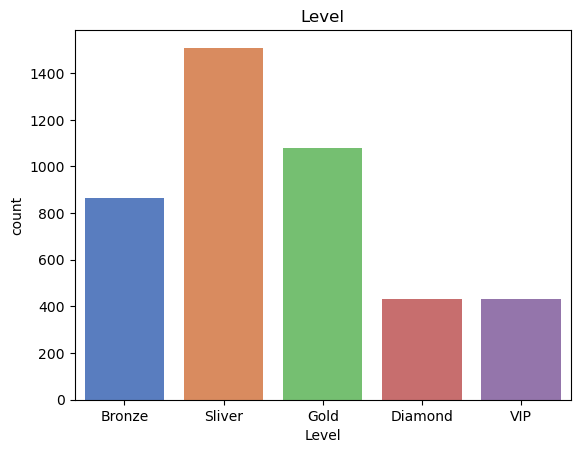

In [35]:
sns.countplot(x='Level', data=real_df, palette='muted', order=order)
plt.title('Level')
plt.show()

### Ï∞®Ìä∏ ÏãúÍ∞ÅÌôî ÏûêÎ£å Î∂ÑÏÑù Í≤∞Í≥º 
Í∞Å ÌöåÏõêÏùò Îì±Í∏âÏùÑ ÏãúÍ∞ÅÌôî ÏûêÎ£åÎ°ú Î∂ÑÏÑùÌïú Í≤∞Í≥º VIP, Îã§Ïù¥ÏïÑÎ™¨ÎìúÏùò ÌöåÏõê Îì±Í∏â Í±∞Ïùò ÎèôÏùºÌïú ÏàòÏ§ÄÏùò Î∂ÑÌè¨Î•º Î≥¥Ïù¥Í≥† ÏûàÏúºÎ©∞,
Í∞ÄÏû• ÎßéÏùÄ Î∂ÑÌè¨Î•º Í∞ÄÏßÑ ÌöåÏõê Îì±Í∏âÏùÄ Ïã§Î≤Ñ Îì±Í∏âÏùò ÌöåÏõêÎì§Ïù¥Í≥†, Í∞ÄÏû• ÌïòÏúÑÏùò Î∂ÑÌè¨Î•º Í∞ÄÏßÑ ÌöåÏõê Îì±Í∏âÏùÄ Îã§Ïù¥ÏïÑÎ™¨Îìú,VIP ÌöåÏõêÎì§Ïù¥ÏòÄÏäµÎãàÎã§.
Í∑∏Îü¨ÎÇò Í∞Å Íµ≠Í∞ÄÏóê Îî∞ÎùºÏÑú Ïù¥Îü¨Ìïú Î©§Î≤Ñ Îì±Í∏âÏùÄ ÏÑúÎ°ú Îã§Î•º Ïàò ÏûàÏúºÎ©∞, Ïù¥ Ï†êÏùÑ Ïú†ÏùòÌïòÏó¨ Íµ≠Í∞ÄÎ≥ÑÎ°ú Î©§Î≤Ñ Îì±Í∏âÏùÑ Î∂ÑÏÑùÌïòÎäî Í≤ÉÏù¥ Îçî Ï§ëÏöîÌï† Í≤ÉÏûÖÎãàÎã§.

### üí° Í≤∞Î°†
Ïã§Î≤Ñ ÌöåÏõêÎì§Ïùò ÌäπÏÑ± Î∞è Íµ¨Îß§ Ìå®ÌÑ¥, Í∑∏Î¶¨Í≥† Îã§Ïù¥ÏïÑ Î∞è VIP ÌöåÏõêÎì§Ïùò ÌòúÌÉù Î∞è ÏÑúÎπÑÏä§Ïóê ÎåÄÌïú Î∂ÑÏÑùÏù¥ ÌïÑÏöîÌï† Í≤ÉÏúºÎ°ú Î≥¥ÏûÖÎãàÎã§. ÎòêÌïú, Ïù¥Îü¨Ìïú Î∂ÑÏÑùÏùÑ ÌÜ†ÎåÄÎ°ú VIP ÌöåÏõêÎì§Ïùò ÏàòÎ•º ÎäòÎ¶¨Í≥†, Ïã§ Îì±Í∏â ÌöåÏõêÎì§ÏùÑ Ïú†ÏßÄÌïòÎ©∞ Ïã†Í∑ú Í≥†Í∞ùÏùÑ Ïú†ÏπòÌïòÎäî Ï†ÑÎûµÏùÑ ÏàòÎ¶ΩÌï† ÌïÑÏöîÍ∞Ä ÏûàÏùÑ Í≤ÉÏûÖÎãàÎã§.





In [36]:
real_df['country'].value_counts()
# ÏòÅÍµ≠Ïùò Îç∞Ïù¥ÌÑ∞ ÏàòÍ∞Ä ÏïïÎèÑÏ†ÅÏúºÎ°ú ÎßéÏùÄ Í≤ÉÏúºÎ°ú ÎØ∏Î£®Ïñ¥Î≥¥ÏïÑ ÏïÑÎßà ÏòÅÍµ≠ ÎÇ¥ Í∏∞ÏóÖÏù∏ Í≤ÉÏúºÎ°ú ÏòàÏÉÅ

country
United Kingdom          3896
Germany                   94
France                    87
Spain                     29
Belgium                   24
Switzerland               20
Portugal                  19
Italy                     14
Finland                   12
Norway                    10
Austria                    9
Channel Islands            9
Australia                  9
Sweden                     8
Netherlands                8
Japan                      8
Denmark                    8
Cyprus                     6
Poland                     6
USA                        4
Canada                     4
Greece                     4
Unspecified                4
Israel                     3
EIRE                       3
United Arab Emirates       2
Bahrain                    2
Malta                      2
Saudi Arabia               1
Singapore                  1
Iceland                    1
RSA                        1
Lebanon                    1
Brazil                     1
Czech 

In [37]:
price = real_df.groupby('country')['TotalScore'].sum().sort_values(ascending=False)
print(price)
# Íµ≠Í∞ÄÎ≥Ñ RFM ÌÜµÍ≥Ñ Ìï©ÏÇ∞ = ÏòÅÍµ≠,ÎèÖÏùº,ÌîÑÎûëÏä§,Ïä§ÌéòÏù∏,Î≤®Í∏∞Ïóê,Ïä§ÏúÑÏä§,Ìè¨Î•¥Ìà¨Í∞à,ÌïÄÎûÄÎìú,Ïù¥ÌÉàÎ¶¨ÏïÑ ...

country
United Kingdom          3011.048602
Germany                   76.174048
France                    67.777963
Spain                     23.533556
Belgium                   17.832037
Switzerland               14.237166
Portugal                  12.811181
Finland                   10.318555
Italy                      9.987843
Norway                     8.498738
Australia                  7.206854
Denmark                    7.108694
Netherlands                6.992410
Sweden                     6.717632
Channel Islands            5.790776
Austria                    5.564318
Japan                      5.420424
Poland                     4.606106
EIRE                       4.265093
Cyprus                     4.001851
USA                        3.216859
Unspecified                2.637328
Israel                     2.174922
Canada                     2.029286
Greece                     2.011693
Malta                      1.650211
Iceland                    1.032210
United Arab Emirates

In [38]:
price = real_df.groupby('country')['price'].sum().sort_values(ascending=False)
print(price)

country
United Kingdom          9515.164975
Germany                  213.926206
France                   192.956709
Spain                     65.994045
Belgium                   53.939756
Switzerland               52.577010
Portugal                  43.264320
Italy                     41.220201
Finland                   28.021399
Channel Islands           27.534482
Norway                    24.838218
Australia                 24.263995
Austria                   22.420903
Denmark                   20.230563
Cyprus                    18.663252
Poland                    16.748698
Sweden                    16.243161
Netherlands               15.748095
Japan                     14.357969
Greece                    12.035189
Unspecified                9.959635
USA                        8.156223
EIRE                       7.758567
Israel                     6.931486
Canada                     5.939780
Malta                      5.499084
Bahrain                    5.104545
United Arab Emirates

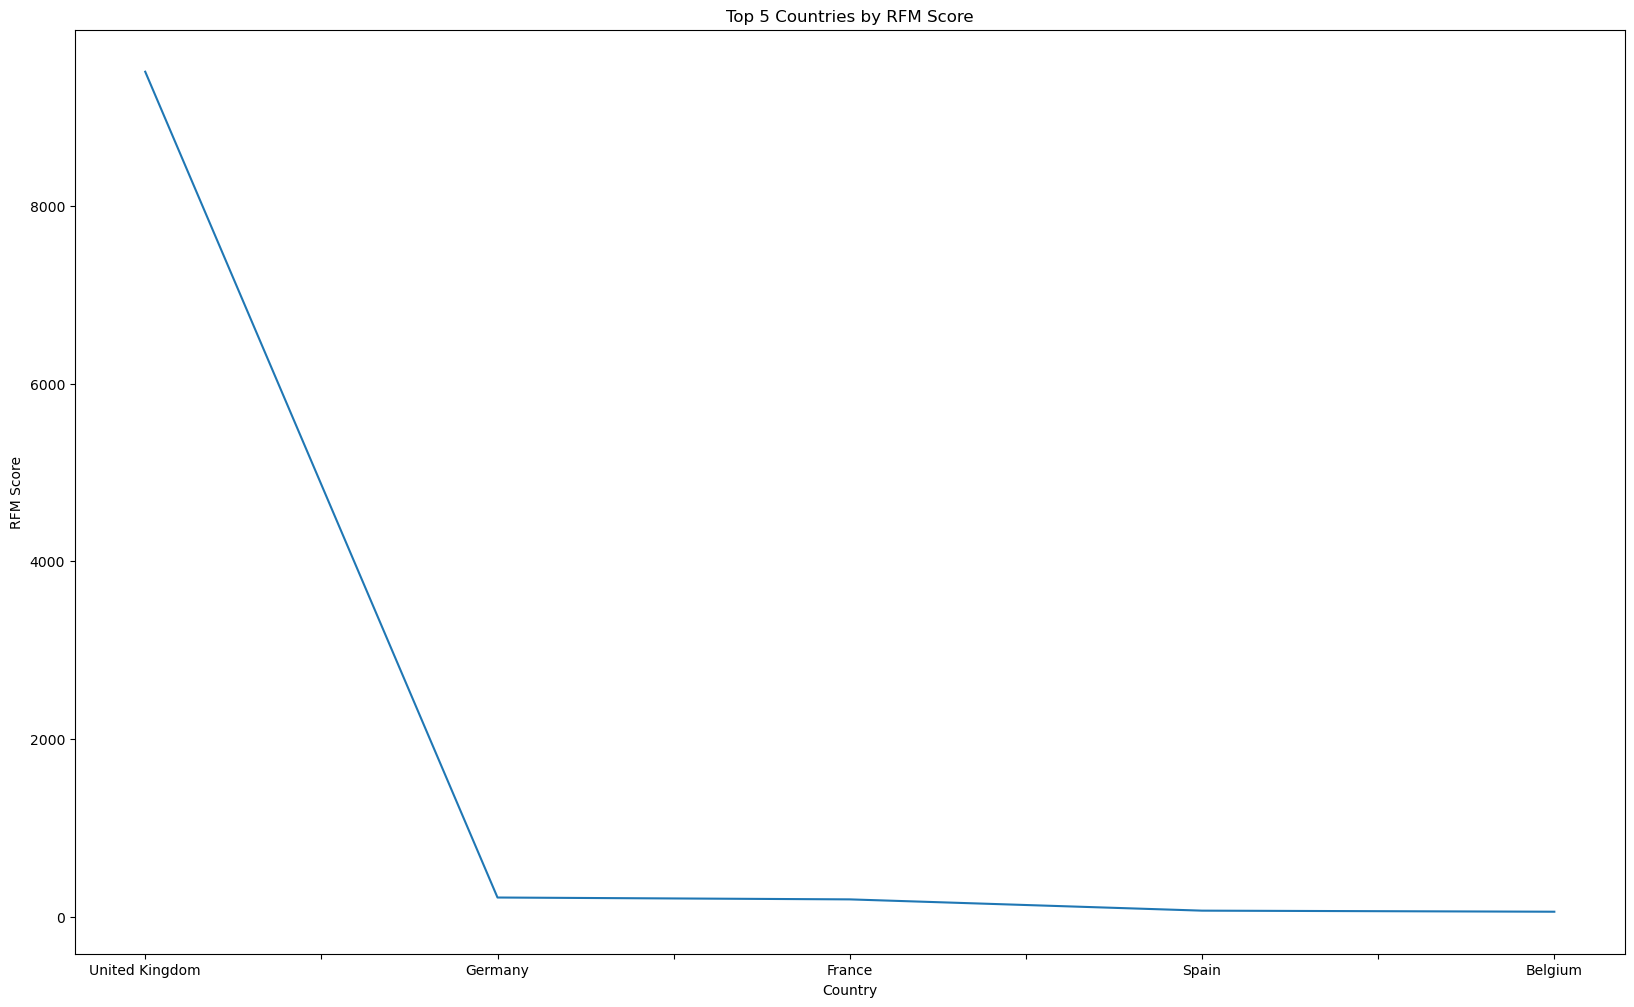

In [39]:
fig, axes = plt.subplots(1, figsize=(20, 12))

# Í∞Å ÎÇòÎùºÎ≥ÑÎ°ú RFM Ï†êÏàòÎ•º Ìï©ÏÇ∞ (ÏÉÅÏúÑ 5Í∞ú Íµ≠Í∞Ä Ï∂îÏ∂ú)
price_by_country = real_df.groupby('country')['price'].sum().nlargest(5)
# nlargest() = Ïó¥ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Í∞ÄÏû• ÌÅ∞ Í∞íÏùÑ Í∞ÄÏßÄÎäî ÏöîÏÜåÎì§ÏùÑ ÏÑ†ÌÉùÌïòÎäî Î©îÏÑúÎìúÏù¥Î©∞, Í∞ÄÏû• ÌÅ∞ Í∞íÏùÑ Í∞ÄÏßÄÎäî 
#ÏÉÅÏúÑ NÍ∞úÏùò ÏöîÏÜåÎ•º ÏÑ†ÌÉùÌï† Îïå ÏÇ¨Ïö©Ìï®

# ÏãúÍ∞ÅÌôî
price_by_country.plot(kind='line', ax=axes)
axes.set_title('Top 5 Countries by RFM Score')
axes.set_xlabel('Country')
axes.set_ylabel('RFM Score')
plt.show()


Ï¥ù Í≤∞Ï†úÍ∏àÏï° Ìï©ÏÇ∞ Ïó≠Ïãú ÏòÅÍµ≠Ïù¥ ÏïïÎèÑÏ†ÅÏúºÎ°ú ÎßéÏùÄ Í≤ÉÏùÑ ÌôïÏù∏ Ìï† Ïàò ÏûàÏúºÎ©∞, Í∑∏ Îã§ÏùåÏúºÎ°ú ÌîÑÎûëÏä§, ÎèÖÏùº, Ïä§ÌéòÏù∏, Î≤®Í∏∞Ïóê ÏàúÏúºÎ°ú ÎßéÏùÄ Í≤ÉÏùÑ Ïïå Ïàò ÏûàÏäµÎãàÎã§.

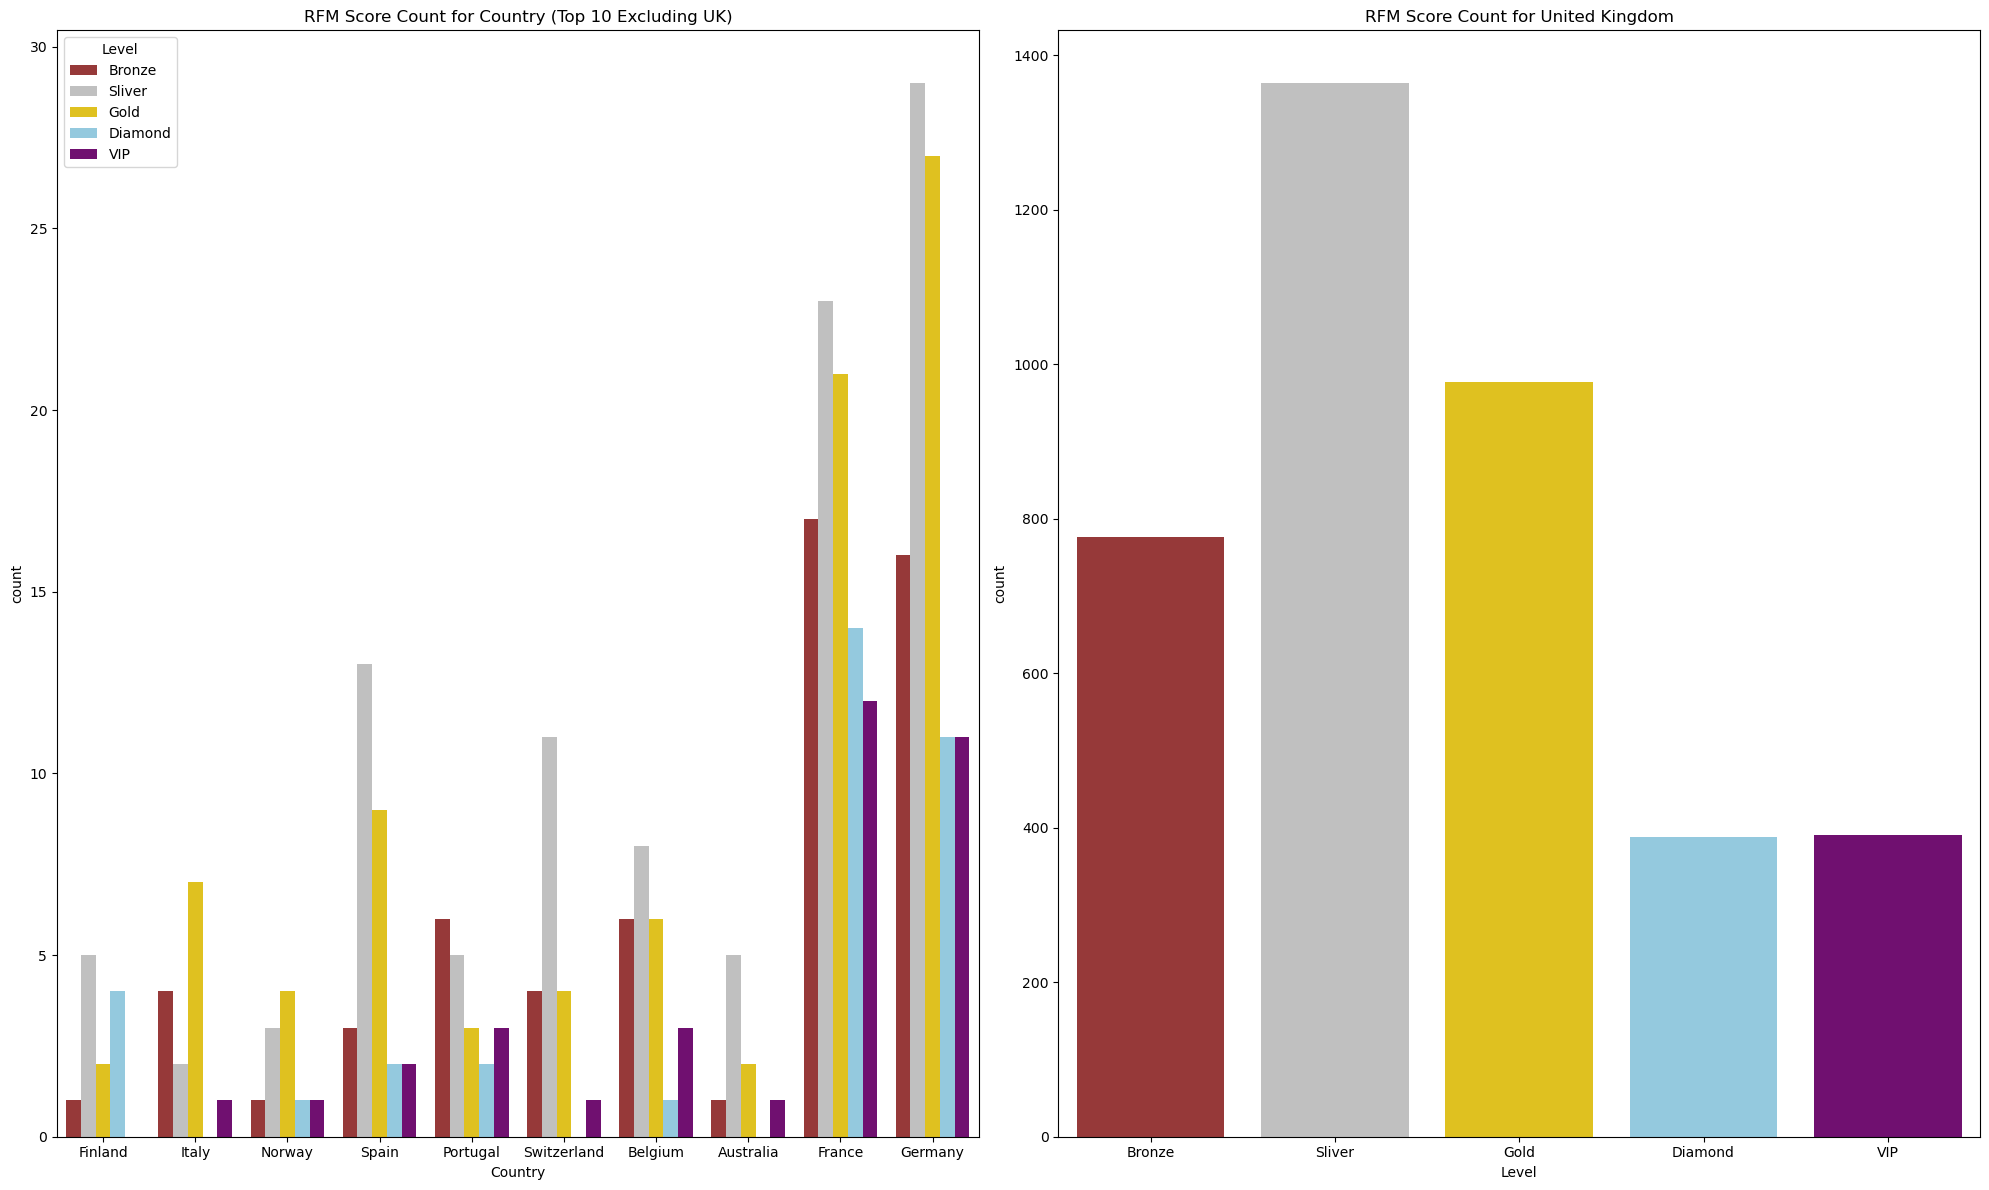

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = {'Bronze': 'brown', 'Sliver': 'silver', 'Gold': 'gold', 'Diamond': 'skyblue', 'VIP': 'purple'}
order_columns = ['Bronze', 'Sliver', 'Gold', 'Diamond', 'VIP']

# ÏòÅÍµ≠ÏùÑ Ï†úÏô∏Ìïú ÏÉÅÏúÑ 10Í∞ú Íµ≠Í∞Ä ÏÑ†ÌÉù (ÏòÅÍµ≠ Íµ≠Ï†ÅÏùÑ Í∞ÄÏßÑ ÌöåÏõêÎì§Ïùò ÏàòÍ∞Ä Îß§Ïö∞ ÎßéÍ∏∞ ÎïåÎ¨∏Ïóê)
# top_countries = real_df[real_df['country'] != 'United Kingdom']['country'].value_counts().nlargest(10).index
# nlargest() = Ïó¥ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Í∞ÄÏû• ÌÅ∞ Í∞íÏùÑ Í∞ÄÏßÄÎäî ÏöîÏÜåÎì§ÏùÑ ÏÑ†ÌÉùÌïòÎäî Î©îÏÑúÎìúÏù¥Î©∞, Í∞ÄÏû• ÌÅ∞ Í∞íÏùÑ Í∞ÄÏßÄÎäî 
#ÏÉÅÏúÑ NÍ∞úÏùò ÏöîÏÜåÎ•º ÏÑ†ÌÉùÌï† Îïå ÏÇ¨Ïö©Ìï®

# ÏòÅÍµ≠ÏùÑ Ï†úÏô∏Ìïú ÏÉÅÏúÑ 10Í∞ú Íµ≠Í∞Ä ÏÑ†ÌÉù (ÏòÅÍµ≠ Íµ≠Ï†ÅÏùÑ Í∞ÄÏßÑ ÌöåÏõêÎì§Ïùò ÏàòÍ∞Ä Îß§Ïö∞ ÎßéÍ∏∞ ÎïåÎ¨∏Ïóê)
# Ïù∏Îç±Ïä§ Ïä¨ÎùºÏù¥Ïã±ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÏòÅÍµ≠ÏùÑ Ï†úÏô∏Ìïú ÏÉÅÏúÑ 10Í∞ú Íµ≠Í∞Ä Ï∂îÏ∂ú 
top_countries = real_df[real_df['country'] != 'United Kingdom']['country'].value_counts().index[:10]

# ÏÉÅÏúÑ 10Í∞ú Íµ≠Í∞ÄÏóê Ìï¥ÎãπÌïòÎäî Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ
filtered_df = real_df[real_df['country'].isin(top_countries)]

# Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(1, 2, figsize=(20, 12))

# ÏôºÏ™Ω Í∑∏ÎûòÌîÑ: ÏòÅÍµ≠ÏùÑ Ï†úÏô∏Ìïú ÏÉÅÏúÑ 10Í∞ú Íµ≠Í∞ÄÏóê ÎåÄÌïú Îì±Í∏âÎ≥Ñ RFM Ìï©ÏÇ∞ Ï∞®Ìä∏ ÏãúÍ∞ÅÌôî
sns.countplot(ax=axes[0], x='country', hue='Level', data=filtered_df, palette=colors, hue_order=order_columns)
axes[0].set_title('RFM Score Count for Country (Top 10 Excluding UK)')
axes[0].set_xlabel('Country')

# Ïò§Î•∏Ï™Ω Í∑∏ÎûòÌîÑ: ÏòÅÍµ≠(United Kingdom)Ïóê ÎåÄÌïú Îì±Í∏âÎ≥Ñ RFM Ìï©ÏÇ∞ Ï∞®Ìä∏ ÏãúÍ∞ÅÌôî 
uk_df = real_df[real_df['country'] == 'United Kingdom']
sns.countplot(ax=axes[1], x='Level', order=order_columns, data=uk_df, palette=colors)
axes[1].set_title('RFM Score Count for United Kingdom')
axes[1].set_xlabel('Level')

plt.tight_layout()
plt.show()

### üåè Ìï¥Ïô∏ ÎßàÏºÄÌåÖ Ï†ÑÎûµ
> (ÏòÅÍµ≠ ÎÇ¥ Í∏∞ÏóÖÏù∏ Í≤ÉÏúºÎ°ú ÌåêÎã®ÌïòÏó¨, ÏòÅÍµ≠ÏùÑ Ï†úÏô∏Ìïú ÏÉÅÏúÑ 10Í∞ú Íµ≠Í∞ÄÏóê ÎåÄÌïú ÎßàÏºÄÌåÖ Ï†ÑÎûµ Î∂ÑÏÑù)

#### <img src="./images/germany.png" width="30px"> ÎèÖÏùº ÎßàÏºÄÌåÖ Ï†ÑÎûµ
- ÎèÖÏùºÏóêÏÑúÎäî Í≥®Îìú Îì±Í∏â ÌöåÏõêÎì§Ïù¥ Í∞ÄÏû• ÎßéÏùÄ Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ¨ÏúºÎØÄÎ°ú, ÎèÖÏùº ÏãúÏû•ÏóêÏÑúÎäî Í≥®Îìú Îì±Í∏â ÌöåÏõêÎì§ÏùÑ Ï£ºÏöî ÌÉÄÍ≤üÏúºÎ°ú ÏÇºÏùÑ Ïàò ÏûàÏäµÎãàÎã§.
- Í≥®Îìú Îì±Í∏â ÌöåÏõêÎì§ÏùÄ ÎÜíÏùÄ Íµ¨Îß§Ïú®Í≥º Ï∂©ÏÑ±ÎèÑÎ•º Î≥¥Ïù¥Í∏∞ ÎïåÎ¨∏Ïóê, ÌäπÎ≥ÑÌïú ÌòúÌÉùÏù¥ÎÇò ÌîÑÎ¶¨ÎØ∏ÏóÑ ÏÑúÎπÑÏä§Î•º Ï†úÍ≥µÌïòÏó¨ Ïù¥ÌÉàÏùÑ Î∞©ÏßÄÌïòÍ≥† Î∏åÎûúÎìú Ï∂©ÏÑ±ÎèÑÎ•º ÎÜíÏùº Ïàò ÏûàÏäµÎãàÎã§.
- Ïã§Î≤Ñ Îì±Í∏â ÌöåÏõêÎèÑ ÏÉÅÎãπÌïú ÏàòÎ•º Ï∞®ÏßÄÌïòÍ≥† ÏûàÏúºÎØÄÎ°ú, Ïù¥Îì§ÏóêÍ≤åÎèÑ Ï£ºÏùòÎ•º Í∏∞Ïö∏Ïùº ÌïÑÏöîÍ∞Ä ÏûàÏäµÎãàÎã§.
- Ïã§Î≤Ñ Îì±Í∏â ÌöåÏõêÎì§ÏóêÍ≤åÎäî Ï∂îÍ∞Ä ÌòúÌÉùÏùÑ Ï†úÍ≥µÌïòÏó¨ Ï∂©ÏÑ±ÎèÑÎ•º ÎÜíÏù¥Í≥†, ÏÉÅÏúÑ Îì±Í∏âÏúºÎ°úÏùò Îì±Í∏â ÏóÖÍ∑∏Î†àÏù¥ÎìúÎ•º Ïú†ÎèÑÌïòÏó¨ ÏàòÏùµÏùÑ Ï∞ΩÏ∂ú Ìï† Ïàò ÏûàÏäµÎãàÎã§.
- Îã§Ïù¥ÏïÑÎ™¨Îìú Îì±Í∏âÏùò ÌöåÏõêÎèÑ Î∏åÎ°†Ï¶à,VIP ÌöåÏõê Î≥¥Îã§ ÎßéÏùÄ ÏàòÏπòÎ•º Í∏∞Î°ùÌïòÏòÄÏúºÎØÄÎ°ú Îã§Ïù¥ÏïÑÎ™¨Îìú Îì±Í∏â ÌöåÏõêÎì§ÏóêÍ≤åÎäî ÌäπÎ≥Ñ ÌîÑÎ°úÎ™®ÏÖòÏùÑ Ï†úÍ≥µÌïòÏó¨, ÏàòÏùµÏÑ±ÏùÑ Ï∞ΩÏ∂úÌï† Ïàò ÏûàÏäµÎãàÎã§.
- Î∏åÎ°†Ï¶à Î∞è VIP Îì±Í∏â ÌöåÏõêÏùò ÏàòÍ∞Ä ÏÉÅÎåÄÏ†ÅÏúºÎ°ú Ï†ÅÏùÄ Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ¨ÏúºÎØÄÎ°ú, Ïù¥Îì§ÏùÑ ÎäòÎ¶¨Îäî Îç∞Ïóê Ï§ëÏ†êÏùÑ ÎëêÏñ¥Ïïº Ìï©ÎãàÎã§.
- Î∏åÎ°†Ï¶à Î∞è VIP Îì±Í∏â ÌöåÏõêÎì§ÏùÑ ÎåÄÏÉÅÏúºÎ°ú Ìïú ÌäπÎ≥ÑÌïú ÌòúÌÉùÏù¥ÎÇò ÌîÑÎ°úÎ™®ÏÖòÏùÑ Ï†úÍ≥µÌïòÏó¨ Îì±Í∏â ÏóÖÍ∑∏Î†àÏù¥ÎìúÎ•º Ïú†ÎèÑÌï† Ïàò ÏûàÏäµÎãàÎã§.

#### <img src="./images/france.png" width="30px"> ÌîÑÎûëÏä§ ÎßàÏºÄÌåÖ Ï†ÑÎûµ
- Í∞ÄÏû• ÎßéÏùÄ ÌöåÏõêÏù¥ Ïã§Î≤Ñ Îì±Í∏âÏù¥ÎØÄÎ°ú, ÌîÑÎûëÏä§ ÏãúÏû•ÏóêÏÑúÎäî Ïã§Î≤Ñ Îì±Í∏â ÌöåÏõêÎì§ÏùÑ Ï£ºÏöî ÌÉÄÍ≤üÏúºÎ°ú ÏÇºÏùÑ Ïàò ÏûàÏäµÎãàÎã§.
- Ïã§Î≤Ñ Îì±Í∏â ÌöåÏõêÎì§ÏóêÍ≤åÎäî Ìï†Ïù∏ ÌòúÌÉùÏù¥ÎÇò ÌäπÎ≥ÑÌïú ÌòúÌÉùÏùÑ Ï†úÍ≥µÌïòÏó¨ Ï∂©ÏÑ±ÎèÑÎ•º ÎÜíÏùº Ïàò ÏûàÏäµÎãàÎã§.
- Í≥®Îìú Î∞è Îã§Ïù¥ÏïÑÎ™¨Îìú Îì±Í∏âÍ≥º Í∞ôÏùÄ ÏÉÅÏúÑ Îì±Í∏âÏùò ÌöåÏõêÎì§ÎèÑ ÏÉÅÎãπÏàòÎ•º Ï∞®ÏßÄÌïòÍ≥† ÏûàÏúºÎØÄÎ°ú, Ïù¥Îì§ÏóêÍ≤å Ï∂îÍ∞Ä ÌòúÌÉùÏùÑ Ï†úÍ≥µÌïòÏó¨ Ïù¥ÌÉàÏùÑ Î∞©ÏßÄÌïòÍ≥† Ï∂©ÏÑ±ÎèÑÎ•º ÎÜíÏùº Ïàò ÏûàÏäµÎãàÎã§.
- ÌäπÌûà Ïù¥Îü¨Ìïú ÏÉÅÏúÑ Îì±Í∏âÏùò Í≥†Í∞ùÏùò Í≤ΩÏö∞ Í∏∞ÏóÖÏùò ÌïµÏã¨ Í≥†Í∞ùÏù¥Í∏∞ ÎïåÎ¨∏Ïóê, ÌîÑÎ¶¨ÎØ∏ÏóÑ ÏÑúÎπÑÏä§ÎÇò Ï†úÌíàÏùÑ ÌôçÎ≥¥ÌïòÍ≥† Ïù¥ÏôÄ Í∞ôÏùÄ ÎßàÏºÄÌåÖÏùÑ ÌîÑÎûëÏä§ ÎÇ¥Ïùò Í≥®Îìú Î∞è Îã§Ïù¥ÏïÑÎ™¨Îìú ÌöåÏõêÎì§ÏùÑ ÏúÑÌï¥ ÎßàÏºÄÌåÖ Ï†ÑÎûµÏùÑ ÌôïÏû•ÌïòÏó¨Ïïº Ìï©ÎãàÎã§.
- Î∏åÎ°†Ï¶à Î∞è VIP Îì±Í∏â ÌöåÏõêÏùò ÏàòÍ∞Ä ÏÉÅÎåÄÏ†ÅÏúºÎ°ú Ï†ÅÏùÄ Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ¨ÏúºÎØÄÎ°ú, Ïù¥Îì§ÏùÑ ÎäòÎ¶¨Îäî Îç∞Ïóê Ï¥àÏ†êÏùÑ ÎßûÏ∂ú ÌïÑÏöîÍ∞Ä ÏûàÏäµÎãàÎã§.
- Î∏åÎ°†Ï¶à Îì±Í∏â ÌöåÏõêÎì§ÏóêÍ≤åÎäî ÌäπÎ≥ÑÌïú Ìï†Ïù∏ ÌòúÌÉùÏùÑ Ï†úÍ≥µÌïòÏó¨ Îì±Í∏â ÏóÖÍ∑∏Î†àÏù¥ÎìúÎ•º Ïú†ÎèÑÌï† Ïàò ÏûàÏäµÎãàÎã§.
- VIP Îì±Í∏â ÌöåÏõêÎì§ÏóêÍ≤åÎäî ÌäπÎ≥Ñ ÌîÑÎ°úÎ™®ÏÖòÏùÑ Ï†úÍ≥µÌïòÏó¨ Ïù¥ÌÉàÏùÑ Î∞©ÏßÄÌïòÍ≥† Ïù¥Ï†ÑÎ≥¥Îã§ ÎÜíÏùÄ ÏàòÏùµÏùÑ Ï∞ΩÏ∂ú Ìï† Ïàò ÏûàÏäµÎãàÎã§.
  

#### ÏúÑÏùò Ï†ÑÎûµÎì§ÏùÑ Ï†ÅÏö©ÌïòÏó¨ ÏÉÅÏúÑ 2Í∞úÏùò Íµ≠Í∞Ä ÏãúÏû•ÏóêÏÑú Î∏åÎûúÎìúÏùò Ïù∏ÏßÄÎèÑÎ•º ÎÜíÏù¥Í≥† Í≥†Í∞ùÎì§Ïùò Ï∂©ÏÑ±ÎèÑÎ•º ÎÜíÏùº Ïàò ÏûàÏùÑ Í≤ÉÏûÖÎãàÎã§.
- ÎèÖÏùº ÌîÑÎûëÏä§ Îã§ÏùåÏúºÎ°ú RFM Ìï©ÏÇ∞ Ï†êÏàòÍ∞Ä ÎÜíÏïòÎçò Íµ≠Í∞ÄÎ°úÎäî Ïä§ÌéòÏù∏, Ïä§ÏúÑÏä§, Î≤®Í∏∞Ïóê ÏàúÏù¥ÏòÄÏäµÎãàÎã§. 
- Ïù¥ 3Í∞úÏùò Íµ≠Í∞ÄÎì§Ïùò Í≤ΩÏö∞ Í∞Å Î©§Î≤ÑÎ≥Ñ Îì±Í∏âÏù¥ Í∞ÅÍ∏∞ Îã¨ÎûêÏúºÎ©∞, Ïù¥Î•º ÌÜµÍ≥ÑÎ°ú ÎÇòÎ®∏ÏßÄ Íµ≠Í∞ÄÎì§Ïóê ÎåÄÌï¥ÏÑú Î∂ÑÏÑùÏùÑ ÌïòÏòÄÏäµÎãàÎã§.

#### <img src="./images/spain.png" width="30px"> Ïä§ÌéòÏù∏ ÎßàÏºÄÌåÖ Ï†ÑÎûµ
- Ïä§ÌéòÏù∏ÏùÄ Ïã§Î≤Ñ Îì±Í∏â ÌöåÏõêÎì§Ïù¥ Í∞ÄÏû• ÎÜíÏùÄ ÎπÑÏ§ëÏùÑ Ï∞®ÏßÄÌïòÏòÄÍ≥†, Í∑∏ Îã§ÏùåÏúºÎ°ú Í≥®Îìú Îì±Í∏âÏùò ÌöåÏõêÎì§Ïù¥ ÎÜíÏùÄ ÎπÑÏ§ëÏùÑ Ï∞®ÏßÄ ÌïòÏòÄÏäµÎãàÎã§.  Í∑∏Î¶¨Í≥† Ïä§ÌéòÏù∏ÏóêÏÑúÎäî Îã§Ïù¥ÏïÑ Î∞è VIP Îì±Í∏âÏùò ÌöåÏõêÎì§Ïù¥ Î∏åÎ°†Ï¶à Îì±Í∏âÏùò ÌöåÏõêÎì§Ïùò ÏàòÎ≥¥Îã§ ÎßéÏùÄ Í≤ÉÏùÑ Ïïå Ïàò ÏûàÏäµÎãàÎã§.  Ïù¥Î•º Î∞îÌÉïÏúºÎ°ú Îã§Ïù¥ÏïÑÎ™¨Îìú Îì±Í∏â ÌöåÏõêÎì§ÏóêÍ≤å ÎÜíÏùÄ ÏÑúÎπÑÏä§ ÌíàÏßàÍ≥º Í∞úÏù∏ÌôîÎêú Í≤ΩÌóòÏùÑ Ï†úÍ≥µÌïòÏó¨ Ïù¥Îì§Ïùò ÎßåÏ°±ÎèÑÎ•º ÎÜíÏùº Ïàò ÏûàÏäµÎãàÎã§.

#### <img src="./images/swice.png" width="30px"> Ïä§ÏúÑÏä§ ÎßàÏºÄÌåÖ Ï†ÑÎûµ
- Ïä§ÏúÑÏä§Îäî Í≥®Îìú Îì±Í∏âÏùò ÌöåÏõêÎì§Ïù¥ Í∞ÄÏû• ÎßéÏù¥ Î∂ÑÌè¨ÎêòÏñ¥ÏûàÏóàÍ≥†,, Ïù¥Îü¨Ìïú Í≥®Îìú Îì±Í∏â ÌöåÏõêÎì§ÏóêÍ≤åÎäî Ï∂îÍ∞Ä ÌòúÌÉù Î∞è ÌîÑÎ°úÎ™®ÏÖòÏùÑ Ï†úÍ≥µÌïòÏó¨ ÏÉÅÏúÑ Îì±Í∏âÏúºÎ°úÏùò ÏóÖÍ∑∏Î†àÏù¥ÎìúÎ•º Ïú†ÎèÑÌïòÍ≥† Ïù¥ÌÉàÏùÑ Î∞©ÏßÄÌïòÏó¨Ïïº ÌïòÎäî ÎßàÏºÄÌåÖ Ï†ÑÎûµÏùÑ ÏÑ∏ÏõåÏïºÌï©ÎãàÎã§.
- 
#### <img src="./images/bel.png" width="30px"> Î≤®Í∏∞Ïóê ÎßàÏºÄÌåÖ Ï†ÑÎûµ
- Í∑∏ Îã§Ïùå Î≤®Í∏∞ÏóêÏùò Í≤ΩÏö∞ ÏïïÎèÑÏ†ÅÏúºÎ°ú Ïã§Î≤Ñ Îì±Í∏âÏùò ÌöåÏõêÎì§Ïù¥ Í∞ÄÏû• ÎßéÏïòÏúºÎ©∞ Ïã§Î≤Ñ Îì±Í∏âÏùò ÌöåÏõêÎì§ÏóêÍ≤åÎäî Ï∂îÍ∞Ä ÌòúÌÉù Î∞è ÌîÑÎ°úÎ™®ÏÖòÏùÑ Ï†úÍ≥µÌïòÏó¨ Í≥®Îìú Îì±Í∏âÏúºÎ°úÏùò ÏóÖÍ∑∏Î†àÏù¥ÎìúÎ•º Ïú†ÎèÑÌïòÍ≥† Ïù¥ÌÉàÏùÑ Î∞©ÏßÄÌïòÏó¨Ïïº ÌïòÎäî ÎßàÏºÄÌåÖ Ï†ÑÎûµÏùÑ ÏÑ∏ÏõåÏïºÌï©ÎãàÎã§. 


### Í≤∞Î°† 
ÏÉÅÏúÑ 10Í∞ú Íµ≠Í∞Ä Ï§ë Í∞ÄÏû• ÎÜíÏùÄ RFM Ï†êÏàòÎ•º Í∏∞Î°ùÌïú ÎèÖÏùºÍ≥º ÌîÑÎûëÏä§Ïóê ÏßëÏ§ëÏ†ÅÏù∏ ÎßàÏºÄÌåÖ Ï†ÑÎûµÏùÑ ÌéºÏ≥êÏïº ÌïòÎ©∞, ÎÇòÎ®∏ÏßÄ Íµ≠Í∞Ä Îì§Ïóê ÎåÄÌï¥ÏÑúÎèÑ ÏïûÏÑú Î∂ÑÏÑùÌïú Í∞úÎ≥Ñ Íµ≠Í∞ÄÏóê ÎåÄÌïú ÎßàÏºÄÌåÖ Ï†ÑÎûµÏùÑ Ï∞∏Í≥†ÌïòÏó¨ Í∞Å Íµ≠Í∞ÄÏùò ÌäπÏÑ±Í≥º ÌöåÏõê Îì±Í∏â Î∂ÑÌè¨Ïóê ÎßûÏ∂∞ ÎßûÏ∂§Ìòï ÎßàÏºÄÌåÖ Ï†ÑÎûµÏùÑ ÎèÑÏûÖÌïòÏó¨Ïïº Ìï©ÎãàÎã§.

In [41]:
spain_df = real_df[real_df['country'] == 'Spain']
spain_df["Level"].value_counts()


Level
Sliver     13
Gold        9
Bronze      3
Diamond     2
VIP         2
Name: count, dtype: int64

In [42]:
swice_df = real_df[real_df['country'] == 'Belgium']
swice_df["Level"].value_counts()


Level
Sliver     8
Bronze     6
Gold       6
VIP        3
Diamond    1
Name: count, dtype: int64

### <img src="./images/uk.png" width="30px"> ÏòÅÍµ≠ ÎÇ¥ ÎßàÏºÄÌåÖ Ï†ÑÎûµ 
> RFM Î∂ÑÏÑù Í≤∞Í≥º Í∞ÄÏû• ÎßéÏùÄ ÎπÑÏ§ëÏùÑ Ï∞®ÏßÄÌïú ÏòÅÍµ≠Ïùò Í≤ΩÏö∞ Í≥®Îìú Îì±Í∏âÏùò ÌöåÏõêÎì§Ïù¥ Í∞ÄÏû• ÎßéÏùÄ Í≤ÉÏùÑ ÌôïÏù∏ Ìï† Ïàò ÏûàÏúºÎ©∞,

> Í∑∏ Îã§ÏùåÏúºÎ°ú Î∏åÎ°†Ï¶à, Îã§Ïù¥ÏïÑÎ™¨Îìú, Ïã§Î≤Ñ , VIP Îì±Í∏â ÏàúÏúºÎ°ú ÌöåÏõêÎì§Ïùò Îì±Í∏âÏù¥ Î∂ÑÌè¨ ÎêòÏûàÎäî Í≤ÉÏùÑ ÌôïÏù∏ Ìï† Ïàò ÏûàÏóàÏäµÎãàÎã§.

#### Í≥®Îìú Îì±Í∏â ÌöåÏõê ÌÉÄÍ≤üÌåÖ
- Í≥®Îìú Îì±Í∏â ÌöåÏõêÏù¥ Í∞ÄÏû• ÎßéÏùÄ Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ¨ÏúºÎØÄÎ°ú, Í≥®Îìú Îì±Í∏â ÌöåÏõêÏùÑ Ï§ëÏ†êÏ†ÅÏúºÎ°ú ÌÉÄÍ≤üÏúºÎ°ú ÏÇºÏäµÎãàÎã§.
- Í≥®Îìú Îì±Í∏â ÌöåÏõêÎì§ÏùÄ Ïù¥ÎØ∏ ÎÜíÏùÄ Ï∂©ÏÑ±ÎèÑÎ•º Î≥¥Ïù¥Îäî Í≥†Í∞ùÏù¥ÎØÄÎ°ú, Ï∂îÍ∞Ä ÌòúÌÉùÏùÑ Ï†úÍ≥µÌïòÏó¨ Í∑∏Îì§Ïùò Ï∂©ÏÑ±ÎèÑÎ•º Ïú†ÏßÄÌïòÍ≥† Ïù¥ÌÉàÏùÑ Î∞©ÏßÄÌï©ÎãàÎã§.
- Í≥®Îìú Îì±Í∏â ÌöåÏõêÎì§ÏùÑ ÎåÄÏÉÅÏúºÎ°ú Ìïú ÌäπÎ≥Ñ ÌîÑÎ°úÎ™®ÏÖò, Ìï†Ïù∏ ÌòúÌÉù Îì±ÏùÑ Ï†úÍ≥µÌïòÏó¨ Í∑∏Îì§Ïùò ÎßåÏ°±ÎèÑÎ•º ÎÜíÏù¥Í≥† Ï∂îÍ∞Ä Íµ¨Îß§Î•º Ïú†ÎèÑÌï©ÎãàÎã§.
#### Î∏åÎ°†Ï¶à Î∞è Îã§Ïù¥ÏïÑÎ™¨Îìú, Ïã§Î≤Ñ, VIP Îì±Í∏â ÌöåÏõê ÌÉÄÍ≤üÌåÖ
- Í≥®Îìú Îì±Í∏â Ïù¥Ïô∏Ïùò ÌöåÏõêÎì§ÏóêÍ≤åÎèÑ Ï£ºÏùòÎ•º Í∏∞Ïö∏Ïù¥Î©∞, Í∞Å Îì±Í∏âÏóê ÎßûÎäî ÌäπÎ≥ÑÌïú ÌòúÌÉùÏùÑ Ï†úÍ≥µÌï©ÎãàÎã§.
- Î∏åÎ°†Ï¶à Îì±Í∏â ÌöåÏõêÏóêÍ≤åÎäî Îì±Í∏â ÏóÖÍ∑∏Î†àÏù¥ÎìúÎ•º Ïú†ÎèÑÌïòÎäî ÌòúÌÉùÏùÑ Ï†úÍ≥µÌïòÏó¨ Ï∂©ÏÑ±ÎèÑÎ•º ÎÜíÏûÖÎãàÎã§.
- VIP Îì±Í∏â ÌöåÏõêÎì§ÏóêÍ≤åÎäî VIP ÏÑúÎπÑÏä§, Ïù¥Î≤§Ìä∏ Ï¥àÎåÄ Îì± Í≥†Í∏â ÏÑúÎπÑÏä§Î•º Ï†úÍ≥µÌïòÏó¨ ÏàòÏùµÏÑ±ÏùÑ Ìñ•ÏÉÅÏãúÌÇµÎãàÎã§.
- Îã§Ïù¥ÏïÑÎ™¨Îìú Îì±Í∏â ÌöåÏõêÎì§ÏóêÍ≤åÎäî VIP Îì±Í∏âÏúºÎ°úÏùò ÏóÖÍ∑∏Î†àÏù¥ÎìúÎ•º Ïú†ÎèÑÌïòÏó¨ ÌäπÎ≥Ñ ÌîÑÎ°úÎ™®ÏÖòÏùÑ Ï†úÍ≥µÌïòÍ±∞ÎÇò Ìï†Ïù∏ ÌòúÌÉùÏùÑ Ï†úÍ≥µÌï©ÎãàÎã§.
- Î∏åÎ°†Ï¶à Îì±Í∏â ÌöåÏõêÎì§ÏóêÍ≤åÎäî ÌäπÎ≥ÑÌïú Ìï†Ïù∏ ÌòúÌÉùÏùÑ Ï†úÍ≥µÌïòÏó¨ Ïù¥ÌÉàÏùÑ Î∞©ÏßÄÌïòÍ≥†, Ïù¥Îì§ÏùÑ ÎäòÎ¶¨Îäî Îç∞Ïóê Ï§ëÏ†êÏùÑ ÎëêÏñ¥Ïïº Ìï©ÎãàÎã§.
#### Í≤∞Î°† 
Í∞Å Îì±Í∏âÏùò ÌöåÏõêÎì§ÏóêÍ≤å ÏúÑÏôÄ Í∞ôÏùÄ ÎßûÏ∂§Ìòï ÎßàÏºÄÌåÖ Ï∫†ÌéòÏù∏ÏùÑ Ïã§ÌñâÌïòÍ≥†, Ïù¥Îü¨Ìïú Ï†ÑÎûµÏùÑ ÌÜµÌï¥ ÏòÅÍµ≠ ÎÇ¥ Í≥†Í∞ùÎì§Ïùò Ï∂©ÏÑ±ÎèÑÎ•º ÎÜíÏù¥Í≥† Îß§Ï∂úÏùÑ Ï¶ùÍ∞ÄÏãúÌÇ¨ Ïàò ÏûàÏäµÎãàÎã§.

In [43]:
real_df.groupby('Level')['code'].value_counts()
real_df['code'].value_counts()

real_df.groupby('code')['country'].value_counts()

code    country       
10002   Germany           1
10080   United Kingdom    1
10120   United Kingdom    1
10125   Germany           2
        France            1
                         ..
85202   United Kingdom    1
90012A  United Kingdom    1
90199C  United Kingdom    1
M       United Kingdom    4
        Germany           1
Name: count, Length: 1439, dtype: int64

In [45]:
real_df['code'].value_counts().index[:10]

Index(['21034', '20914', '20725', '85123A', '22197', '15036', '85099B',
       '20685', '22086', '22178'],
      dtype='object', name='code')

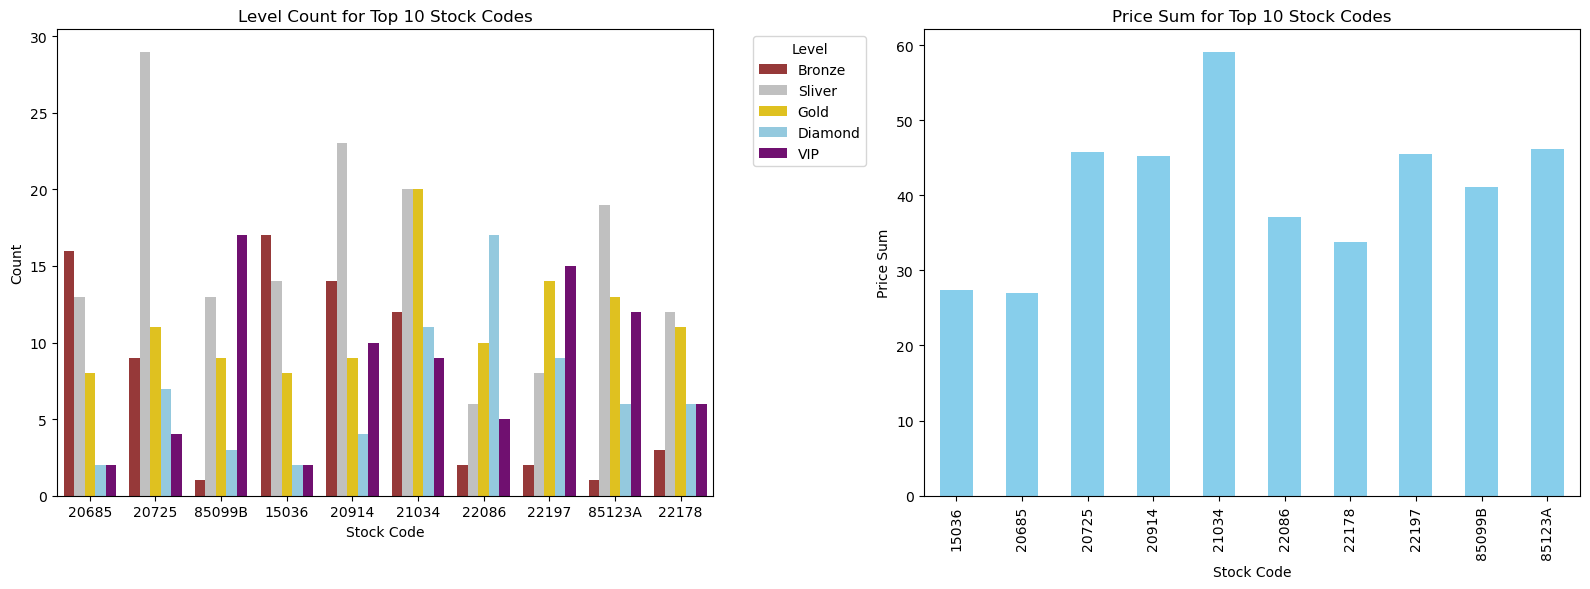

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# ÏÉÅÏúÑ 10Í∞ú ÏÉÅÌíà ÏΩîÎìú Ï∂îÏ∂ú
top_codes = real_df['code'].value_counts().index[:10]
filtered_df = real_df[real_df['code'].isin(top_codes)]

# Stock Code Î≥Ñ Level Count Î∞è Price Ìï©ÏÇ∞ Í≤∞Í≥º
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Stock Code Î≥Ñ Level Count Ï∞®Ìä∏
colors = {'Bronze': 'brown', 'Sliver': 'silver', 'Gold': 'gold', 'Diamond': 'skyblue', 'VIP': 'purple'}
order_columns = ['Bronze', 'Sliver', 'Gold', 'Diamond', 'VIP']

sns.countplot(ax=axes[0], x='code', hue='Level', data=filtered_df, palette=colors, hue_order=order_columns)
axes[0].set_title('Level Count for Top 10 Stock Codes')
axes[0].set_xlabel('Stock Code')
axes[0].set_ylabel('Count')
axes[0].legend(title='Level', bbox_to_anchor=(1.05, 1), loc='upper left')

# Stock CodeÏùò RFM Ìï©ÏÇ∞ Í≤∞Í≥º Ï∞®Ìä∏
price_sum = filtered_df.groupby('code')['TotalScore'].sum()
price_sum.plot(kind='bar', color='skyblue', ax=axes[1])
axes[1].set_title('Price Sum for Top 10 Stock Codes')
axes[1].set_xlabel('Stock Code')
axes[1].set_ylabel('Price Sum')

plt.tight_layout()
plt.show()


### ÏÉÅÌíàÎ≥Ñ ÎßàÏºÄÌåÖ Ï†ÑÎûµ
- 21034 ÏΩîÎìúÎ•º Í∞ÄÏßÄÎäî  ÏÉÅÌíàÏùò Í≤ΩÏö∞ Ïã§Î≤Ñ Îì±Í∏âÍ≥º Í≥®Îìú Îì±Í∏â ÌöåÏõêÎì§Ïùò Î∂ÑÌè¨ÏàòÍ∞Ä ÎÜíÏùÄ Í≤ÉÏùÑ Î≥¥ÏïÑ Í∞ÄÏû• Ïù∏Í∏∞ ÏÉÅÌíàÏù∏ Í≤ÉÏúºÎ°ú Ï∂îÏ∏° Ìï† Ïàò ÏûàÏäµÎãàÎã§. Ïò§Î•∏Ï™Ω Í∑∏ÎûòÌîÑ Ïó≠Ïãú 21034 ÏÉÅÌíàÏùò RFM Ï†êÏàòÍ∞Ä Í∞ÄÏû• ÎÜíÏùÄ Í≤ÉÏùÑ Î≥º Ïàò ÏûàÏäµÎãàÎã§.
- Í∑∏Î¶¨Í≥† 20725 ÏΩîÎìúÎ•º Í∞ÄÏßÄÎäî Ï†úÌíà ÎòêÌïú Ïã§Î≤Ñ Îì±Í∏âÏùò ÌöåÏõêÎì§Ïùò Î∂ÑÌè¨ÏàòÍ∞Ä ÏïïÎèÑÏ†ÅÏúºÎ°ú ÎßéÏùÄ Í≤ÉÏùÑ ÌôïÏù∏ Ìï† Ïàò ÏûàÏúºÎ©∞, Ïù¥Î•º ÎØ∏Î£®Ïñ¥Î≥¥ÏïòÏùÑÎïå ÎåÄÏ§ëÏ†ÅÏù∏ ÏÉÅÌíàÏù∏Í≤ÉÏúºÎ°ú ÌôïÏù∏ Ìï† Ïàò ÏûàÏäµÎãàÎã§. ÏúÑ Îëê Ìï¥Îãπ ÏÉÅÌíàÏùò Ïù∏Í∏∞Î•º Î∞îÌÉïÏúºÎ°ú Í¥ÄÎ†® ÏÉÅÌíà ÎòêÎäî Î∂ÄÍ∞Ä ÏÉÅÌíàÏùÑ Ìï®Íªò ÎßàÏºÄÌåÖÌïòÏó¨ ÏÉÅÌò∏ Î≥¥ÏôÑÏ†ÅÏù∏ ÏÉÅÌíà ÌåêÎß§Î•º Ïú†ÎèÑÌï† Ïàò ÏûàÏäµÎãàÎã§.
  
- Í∑∏Î¶¨Í≥† 85099B, 22197, 22086 ÏÉÅÌíàÎì§ÏùÄ VIP Îì±Í∏â Î∞è Îã§Ïù¥ÏïÑÎ™¨Îìú Îì±Í∏âÏùò Î∂ÑÌè¨ÏàòÍ∞Ä Í∞ÄÏû• ÎÜíÏùÄ Í≤ÉÏùÑ Î≥º Ïàò ÏûàÏäµÎãàÎã§.
  Ïù¥Î•º Î≥¥ÏïòÏùÑÎïå, Ïù¥Îü¨Ìïú ÏÉÅÌíàÎì§ÏùÄ Î∏åÎûúÎìú Ïù¥ÎØ∏ÏßÄÎÇò ÌíàÏßà Îì±Ïóê ÎåÄÌïú ÎÜíÏùÄ ÌèâÍ∞ÄÎ•º Î∞õÍ≥† ÏûàÏùÑ Í∞ÄÎä•ÏÑ±Ïù¥ ÏûàÏúºÎ©∞, Ïù¥Î•º Î∞îÌÉïÏúºÎ°ú Ï∂îÍ∞ÄÏ†ÅÏù∏ ÎßàÏºÄÌåÖ Î∞è ÌîÑÎ°úÎ™®ÏÖò ÌôúÎèôÏùÑ ÌÜµÌï¥ Ïù¥Îì§ ÌöåÏõêÎì§Ïùò Ï∂©ÏÑ±ÎèÑÎ•º ÎÜíÏùº Ïàò ÏûàÏäµÎãàÎã§.

> Ïù¥Îü¨Ìïú Ï†ÑÎûµÎì§ÏùÑ ÌÜµÌï¥ ÏÉÅÌíàÏùò Ïù∏Í∏∞ÎèÑÎ•º ÎÜíÏù¥Í≥† Í≥†Í∞ùÎì§Ïùò ÎßåÏ°±ÎèÑÎ•º ÎÜíÏù¥Î©∞, Í≤∞Í≥ºÏ†ÅÏúºÎ°ú Îß§Ï∂úÏùÑ Ï¶ùÎåÄÌï† Ïàò ÏûàÏäµÎãàÎã§.'